## Prothom Alo 2019-2021 Data Prep for Visualization

* Author: Sumaia Parveen Shupti
* Created on: 07/07/2021
* Updated on: 07/08/2021

Please un-comment the to_csv lines to retrive the csv files.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime

### Little bit of Preprocessing of 2021 Dataset

In [9]:
df1 = pd.read_csv('../input/prothom-alo-20192021/prothom_alo_2021.csv')
df1 = df1[['date_of_incident', 'time_of_incident', 'published-time',
       'incident_type', 'location', 'death_count', 'injury_count',
       'type_of_vehicle1', 'type_of_vehicle2']]

df1.loc[1, 'time_of_incident'] = '20:00'
df1["time_of_incident"] = pd.to_datetime(df1["time_of_incident"], format='%H:%M').dt.time

df1['date_of_incident'] = pd.to_datetime(df1['date_of_incident'])
df1

,date_of_incident,time_of_incident,published-time,incident_type,location,death_count,injury_count,type_of_vehicle1,type_of_vehicle2
0,2021-06-27,12:25:00,"27 Jun 2021, 09:07",NaN,"Benapole highway, Jessore",4.0,1.0,private car,truck
1,2021-06-23,20:00:00,"23 Jun 2021, 01:29",NaN,Mymensingh-Tangail highway,3.0,0.0,motocycle,truck
2,2021-06-19,NaT,"19 Jun 2021, 09:29",NaN,old Dhaka-Narayanganj highway,2.0,NaN,battery-run auto-rickshaw,covered van
3,2021-06-18,NaT,"18 Jun 2021, 09:58",NaN,Chattogram and Rangamati,7.0,22.0,NaN,NaN
4,2021-06-18,NaT,NaN,head-on,Chattogram,3.0,NaN,Bus,Auto Rickshaw
...,...,...,...,...,...,...,...,...,...
126,2021-02-25,05:30:00,"25 Feb 2021, 21:43",head-on,Bogura,11.0,NaN,bus,bus
127,2021-06-19,00:00:00,"19 Jun 2021, 21:28",head-on,Narsingdi,5.0,7.0,truck,MicroBus
128,2021-03-30,02:30:00,"30 Mar 2021, 22:49",head-on,Chattogram,4.0,NaN,truck,auto rickshaw
129,2021-02-01,11:00:00,"03 Feb 2021, 18:57",fell-off bus,Thakurgaon,1.0,NaN,bus,NaN


### Same for 2019-2020 Dataset

In [10]:
df2 = pd.read_csv('../input/prothom-alo-20192021/prothom_alo_2019_20.csv')
df2 = df2[['date_of_incident', 'time_of_incident', 'published-time',
       'incident_type', 'location', 'death_count', 'injury_count',
       'type_of_vehicle1', 'type_of_vehicle2']]

df2.loc[4, 'date_of_incident'] = '11/03/2020'
df2.loc[87, 'date_of_incident'] = '8/08/2020'
df2.loc[97, 'date_of_incident'] = '7/04/2020'

df2["time_of_incident"] = pd.to_datetime(df2["time_of_incident"]).dt.strftime('%H:%M')

df2['date_of_incident'] = pd.to_datetime(df2['date_of_incident'])
df2

,date_of_incident,time_of_incident,published-time,incident_type,location,death_count,injury_count,type_of_vehicle1,type_of_vehicle2
0,2020-12-27,22:30,"27 Dec 2020, 22:20",NaN,Bogura,1.0,0.0,Truck,Motorcycle
1,2020-12-20,NaN,"20 Dec 2020, 05:39",NaN,Barguna,1.0,0.0,Pickup Van,Motorcycle
2,2020-11-28,11:15,"27 Nov 2020, 23:55",Overtaking,Gopalganj,3.0,25.0,Bus,NaN
3,2020-11-13,10:00,"13 Nov 2020, 03:42",Rear end,Mymensingh,2.0,4.0,Human Hauler,Van
4,2020-11-03,NaN,"02 Nov 2020, 22:09",Head-on,Sirajganj,2.0,NaN,Cargo,Truck
...,...,...,...,...,...,...,...,...,...
225,2020-01-03,15:00,"01 Mar 2020, 06:24",Lost Control,Gopalganj,5.0,NaN,Car,NaN
226,2019-11-30,19:00,"30 Nov 2019, 21:16",NaN,Jashore,NaN,6.0,Truck,Train
227,2019-01-25,05:30,"24 Jan 2019, 23:34",NaN,Cumilla,13.0,NaN,Truck,NaN
228,2019-12-09,NaN,"12 Sep 2019, 07:34",NaN,Sirajganj,2.0,10.0,Truck,Bus


### Concatenating two Dataframes

In [11]:
df = pd.concat([df1, df2])
df['date_of_incident'] = pd.to_datetime(df['date_of_incident'])
df.dtypes

date_of_incident    datetime64[ns]
time_of_incident            object
published-time              object
incident_type               object
location                    object
death_count                float64
injury_count               float64
type_of_vehicle1            object
type_of_vehicle2            object
dtype: object

### Cleaning the "Object" Type Columns

In [12]:
df_obj = df.select_dtypes(['object'])
df_obj

,time_of_incident,published-time,incident_type,location,type_of_vehicle1,type_of_vehicle2
0,12:25:00,"27 Jun 2021, 09:07",NaN,"Benapole highway, Jessore",private car,truck
1,20:00:00,"23 Jun 2021, 01:29",NaN,Mymensingh-Tangail highway,motocycle,truck
2,NaT,"19 Jun 2021, 09:29",NaN,old Dhaka-Narayanganj highway,battery-run auto-rickshaw,covered van
3,NaT,"18 Jun 2021, 09:58",NaN,Chattogram and Rangamati,NaN,NaN
4,NaT,NaN,head-on,Chattogram,Bus,Auto Rickshaw
...,...,...,...,...,...,...
225,15:00,"01 Mar 2020, 06:24",Lost Control,Gopalganj,Car,NaN
226,19:00,"30 Nov 2019, 21:16",NaN,Jashore,Truck,Train
227,05:30,"24 Jan 2019, 23:34",NaN,Cumilla,Truck,NaN
228,NaN,"12 Sep 2019, 07:34",NaN,Sirajganj,Truck,Bus


In [13]:
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip().str.lower())
df

,date_of_incident,time_of_incident,published-time,incident_type,location,death_count,injury_count,type_of_vehicle1,type_of_vehicle2
0,2021-06-27,NaN,"27 jun 2021, 09:07",NaN,"benapole highway, jessore",4.0,1.0,private car,truck
1,2021-06-23,NaN,"23 jun 2021, 01:29",NaN,mymensingh-tangail highway,3.0,0.0,motocycle,truck
2,2021-06-19,NaT,"19 jun 2021, 09:29",NaN,old dhaka-narayanganj highway,2.0,NaN,battery-run auto-rickshaw,covered van
3,2021-06-18,NaT,"18 jun 2021, 09:58",NaN,chattogram and rangamati,7.0,22.0,NaN,NaN
4,2021-06-18,NaT,NaN,head-on,chattogram,3.0,NaN,bus,auto rickshaw
...,...,...,...,...,...,...,...,...,...
225,2020-01-03,15:00,"01 mar 2020, 06:24",lost control,gopalganj,5.0,NaN,car,NaN
226,2019-11-30,19:00,"30 nov 2019, 21:16",NaN,jashore,NaN,6.0,truck,train
227,2019-01-25,05:30,"24 jan 2019, 23:34",NaN,cumilla,13.0,NaN,truck,NaN
228,2019-12-09,NaN,"12 sep 2019, 07:34",NaN,sirajganj,2.0,10.0,truck,bus


### Bringing Uniformity of the Elements of "incident_type"

In [14]:
df['incident_type'] = np.where(df.incident_type == 'head on', 'head-on', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'head -on', 'head-on', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'rear end', 'rear-end', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'lost-control', 'lost control', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'injured', 'collision', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'dashed', 'collision', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'plunged', 'collision', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'crash', 'collision', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'overtaking', 'collision', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'negligence', 'collision', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'over turned', 'overturned', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'stationary  crash', 'crash', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'lost control, overspeeding', 'lost control', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'bad weather ,lost control', 'lost control', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'fell-off bus', 'fell-off', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'overspeeding, ran over', 'ran over', df.incident_type)
df['incident_type'] = np.where(df.incident_type == 'report of last 5 years', np.NaN, df.incident_type)
df.incident_type.dropna().value_counts()

head-on           120
lost control       32
rear-end           25
collision          17
ran over            7
overturned          4
hit and run         2
crash               1
caught fire         1
puncture            1
fell-off            1
collapsed           1
hit pedestrian      1
speeding            1
Name: incident_type, dtype: int64

### **Accident Count**

In [15]:
collision_count = df.incident_type.dropna().value_counts().to_frame().reset_index()
collision_count.columns = ['Collision Type', 'Count']
#collision_count.to_csv('collision_count.csv', index = False)
collision_count

,Collision Type,Count
0,head-on,120
1,lost control,32
2,rear-end,25
3,collision,17
4,ran over,7
5,overturned,4
6,hit and run,2
7,crash,1
8,caught fire,1
9,puncture,1


### **Date-wise Accident Type**

In [16]:
collision_count_2 =  df[['date_of_incident', 'incident_type']]
collision_count_2 = collision_count_2.dropna().reset_index(drop = True)
collision_count_2.columns = ['Date', 'Incident Type']
collision_count_2 = collision_count_2.sort_values(by = 'Date')
#collision_count_2.to_csv('datewise_coll_type.csv', index = False)
collision_count_2

,Date,Incident Type
155,2019-01-05,head-on
154,2019-01-12,rear-end
177,2019-01-19,lost control
171,2019-01-19,head-on
153,2019-02-02,head-on
...,...,...
32,2021-06-24,head-on
31,2021-06-25,rear-end
30,2021-06-26,head-on
28,2021-06-27,head-on


## Adding new columns from the **available** date_of_incident column

In [17]:
df_new = df[['date_of_incident', 'location', 'death_count', 'type_of_vehicle1']].dropna()
df_new.drop_duplicates(keep=False,inplace=True)
df_new = df_new.sort_values(by = 'date_of_incident').reset_index(drop = True)
df_new['Date'] = df_new['date_of_incident'].dt.date
df_new['Year'] = df_new['date_of_incident'].dt.year
df_new['Month'] = df_new['date_of_incident'].dt.month
df_new['Day'] = df_new['date_of_incident'].dt.day
df_new['Day_name'] = df_new['date_of_incident'].dt.day_name()
df_new['DayofWeek'] = df_new['date_of_incident'].dt.weekday
df_new['DayofYear'] = df_new['date_of_incident'].dt.dayofyear
df_new

,date_of_incident,location,death_count,type_of_vehicle1,Date,Year,Month,Day,Day_name,DayofWeek,DayofYear
0,2019-01-05,chapainawabganj,3.0,auto rickshaw,2019-01-05,2019,1,5,Saturday,5,5
1,2019-01-12,dhaka,2.0,bus,2019-01-12,2019,1,12,Saturday,5,12
2,2019-01-19,narayanganj,4.0,car,2019-01-19,2019,1,19,Saturday,5,19
3,2019-01-19,brahmanbaria,2.0,bus,2019-01-19,2019,1,19,Saturday,5,19
4,2019-01-25,cumilla,13.0,truck,2019-01-25,2019,1,25,Friday,4,25
...,...,...,...,...,...,...,...,...,...,...,...
287,2021-06-23,mymensingh-tangail highway,3.0,motocycle,2021-06-23,2021,6,23,Wednesday,2,174
288,2021-06-24,naogaon,2.0,truck,2021-06-24,2021,6,24,Thursday,3,175
289,2021-06-25,jashore,0.0,motocycle,2021-06-25,2021,6,25,Friday,4,176
290,2021-06-26,gulshan,2.0,van,2021-06-26,2021,6,26,Saturday,5,177


### **Monthly Stat of Death Count**

In [18]:
agg_func_math = {
    'death_count':
    ['sum', 'mean', 'median', 'min', 'max']
}
monthly_avg = df_new.groupby(['Month']).agg(agg_func_math).round(2).reset_index()
#monthly_avg.to_csv('monthly_stat.csv', index = False)
monthly_avg

Month death_count                         
                 sum  mean median  min    max
0      1        90.0  3.46    3.0  1.0   13.0
1      2        87.0  2.81    2.0  1.0   11.0
2      3       191.0  4.66    2.0  1.0   25.0
3      4        74.0  3.22    3.0  0.0    9.0
4      5       234.0  8.36    2.0  1.0  168.0
5      6        62.0  2.14    2.0  0.0    7.0
6      7        47.0  2.94    3.0  1.0    6.0
7      8        81.0  4.05    4.0  1.0    8.0
8      9        23.0  1.77    2.0  1.0    3.0
9     10        43.0  1.87    2.0  1.0    4.0
10    11        54.0  2.70    2.0  1.0    8.0
11    12        86.0  3.91    2.0  1.0   12.0

### **Daily Stat of Death Count**

In [19]:
agg_func_math = {
    'death_count':
    ['sum', 'mean', 'median', 'min', 'max']
}
daily_avg = df_new.groupby(['Day']).agg(agg_func_math).round(2).reset_index()
#daily_avg.to_csv('daily_stat.csv', index = False)
daily_avg

Day death_count                          
               sum   mean median  min    max
0    1        15.0   2.50    1.5  1.0    6.0
1    2        16.0   2.29    2.0  1.0    4.0
2    3        48.0   2.67    2.0  1.0    7.0
3    4        27.0   2.70    2.0  1.0    8.0
4    5        33.0   4.12    3.0  0.0   14.0
5    6       227.0  28.38    4.5  1.0  168.0
6    7        36.0   4.00    4.0  1.0    8.0
7    8        15.0   2.50    2.0  1.0    7.0
8    9        24.0   2.40    2.0  1.0    5.0
9   10        30.0   2.73    2.0  1.0    9.0
10  11        19.0   2.38    2.0  1.0    4.0
11  12        30.0   3.00    2.0  1.0    7.0
12  13        23.0   2.88    2.0  1.0    6.0
13  14        10.0   2.00    2.0  1.0    3.0
14  15        13.0   3.25    2.5  1.0    7.0
15  16        17.0   1.89    2.0  1.0    4.0
16  17        25.0   3.12    2.5  2.0    8.0
17  18        42.0   3.00    3.0  1.0    7.0
18  19        59.0   3.69    2.0  1.0   12.0
19  20        25.0   2.78    2.0  1.0    6.0
20  21        53.0   4.42    2.5  1.0   15.0
21  22        37.0   3.36    2.0  1.0    6.0
22  23        12.0   1.50    1.0  1.0    3.0
23  24        16.0   4.00    3.0  2.0    8.0
24  25        55.0   3.24    2.0  0.0   13.0
25  26        34.0   3.78    2.0  1.0   17.0
26  27        22.0   2.75    2.5  1.0    5.0
27  28        35.0   2.92    2.0  1.0    9.0
28  29        24.0   2.40    2.0  1.0    5.0
29  30        24.0   3.00    3.0  2.0    4.0
30  31        26.0   2.89    3.0  2.0    5.0

### **Yearly** Stat of Death Count

In [20]:
agg_func_math = {
    'death_count':
    ['sum', 'mean', 'median', 'min', 'max']
}
yearly_avg = df_new.groupby(['Year']).agg(agg_func_math).round(2).reset_index()
#yearly_avg.to_csv('yearly_stat.csv', index = False)
yearly_avg

Year death_count                         
                sum  mean median  min    max
0  2019       177.0  3.05    2.0  1.0   13.0
1  2020       669.0  4.49    2.0  1.0  168.0
2  2021       226.0  2.66    2.0  0.0   17.0

### **Day of Week** Stat of Death Count

In [21]:
agg_func_math = {
    'death_count':
    ['sum', 'mean', 'median', 'min', 'max']
}
dayw_avg = df_new.groupby(['Day_name']).agg(agg_func_math).round(2).reset_index()
#dayw_avg.to_csv('dayname_stat.csv', index = False)
dayw_avg

Day_name death_count                         
                     sum  mean median  min    max
0     Friday       178.0  3.96    2.0  0.0   25.0
1     Monday        97.0  2.31    2.0  0.0    8.0
2   Saturday       202.0  3.67    3.0  1.0   15.0
3     Sunday       135.0  3.07    2.0  1.0    9.0
4   Thursday       122.0  3.21    2.0  1.0   14.0
5    Tuesday        79.0  2.39    2.0  1.0    5.0
6  Wednesday       259.0  7.40    2.0  1.0  168.0

### **Day of Year** Stat of Death Count

In [22]:
agg_func_math = {
    'death_count':
    ['sum', 'mean', 'median', 'min', 'max']
}
dayy_avg = df_new.groupby(['DayofYear']).agg(agg_func_math).round(2).reset_index()
#dayy_avg.to_csv('dayYear_stat.csv', index = False)
dayy_avg

DayofYear death_count                      
                      sum mean median  min  max
0           1         4.0  4.0    4.0  4.0  4.0
1           3        12.0  6.0    6.0  5.0  7.0
2           5         9.0  4.5    4.5  3.0  6.0
3           7         4.0  4.0    4.0  4.0  4.0
4          11         2.0  2.0    2.0  2.0  2.0
..        ...         ...  ...    ...  ...  ...
192       357         1.0  1.0    1.0  1.0  1.0
193       359         2.0  2.0    2.0  2.0  2.0
194       362         3.0  1.5    1.5  1.0  2.0
195       364         4.0  4.0    4.0  4.0  4.0
196       365         2.0  2.0    2.0  2.0  2.0

[197 rows x 6 columns]

### Data Celaning for Injury Count Stat

In [24]:
df_new_inj = df[['date_of_incident', 'death_count', 'injury_count']].dropna()
df_new_inj.drop_duplicates(keep=False,inplace=True)
df_new_inj = df_new_inj.sort_values(by = 'date_of_incident').reset_index(drop = True)
df_new_inj['Date'] = df_new_inj['date_of_incident'].dt.date
df_new_inj['Year'] = df_new_inj['date_of_incident'].dt.year
df_new_inj['Month'] = df_new_inj['date_of_incident'].dt.month
df_new_inj['Day'] = df_new_inj['date_of_incident'].dt.day
df_new_inj['Day_name'] = df_new_inj['date_of_incident'].dt.day_name()
df_new_inj['DayofWeek'] = df_new_inj['date_of_incident'].dt.weekday
df_new_inj['DayofYear'] = df_new_inj['date_of_incident'].dt.dayofyear
#df_new_inj.to_csv('death_inj_date.csv', index = False)
df_new_inj

,date_of_incident,death_count,injury_count,Date,Year,Month,Day,Day_name,DayofWeek,DayofYear
0,2019-01-19,2.0,15.0,2019-01-19,2019,1,19,Saturday,5,19
1,2019-02-04,3.0,1.0,2019-02-04,2019,2,4,Monday,0,35
2,2019-02-19,1.0,6.0,2019-02-19,2019,2,19,Tuesday,1,50
3,2019-02-23,2.0,5.0,2019-02-23,2019,2,23,Saturday,5,54
4,2019-03-31,2.0,2.0,2019-03-31,2019,3,31,Sunday,6,90
...,...,...,...,...,...,...,...,...,...,...
165,2021-06-23,3.0,0.0,2021-06-23,2021,6,23,Wednesday,2,174
166,2021-06-24,2.0,0.0,2021-06-24,2021,6,24,Thursday,3,175
167,2021-06-25,0.0,2.0,2021-06-25,2021,6,25,Friday,4,176
168,2021-06-26,2.0,2.0,2021-06-26,2021,6,26,Saturday,5,177


### Injury Count Stat **Daily**, **Monthly**, **Yearly**, **Day of Week**, **Day of Year**

In [25]:
agg_func_math = {
    'injury_count':
    ['sum', 'mean', 'median', 'min', 'max']
}

daily_avg_inj = df_new_inj.groupby(['Day']).agg(agg_func_math).round(2).reset_index()
#daily_avg_inj.to_csv('daily_stat_inj.csv', index = False)
display(daily_avg_inj.head())

monthly_avg_inj = df_new_inj.groupby(['Month']).agg(agg_func_math).round(2).reset_index()
#monthly_avg_inj.to_csv('monthly_stat_inj.csv', index = False)
display(monthly_avg_inj.head())

yearly_avg_inj = df_new_inj.groupby(['Year']).agg(agg_func_math).round(2).reset_index()
#yearly_avg_inj.to_csv('yearly_stat_inj.csv', index = False)
display(yearly_avg_inj.head())

dayname_avg_inj = df_new_inj.groupby(['Day_name']).agg(agg_func_math).round(2).reset_index()
#dayname_avg_inj.to_csv('dayname_stat_inj.csv', index = False)
display(dayname_avg_inj.head())

dayy_avg_inj = df_new_inj.groupby(['DayofYear']).agg(agg_func_math).round(2).reset_index()
#dayy_avg_inj.to_csv('dayyear_stat_inj.csv', index = False)
display(dayy_avg_inj.head())

Day injury_count                         
               sum   mean median  min   max
0   1         27.0   5.40    2.0  1.0  20.0
1   2         27.0   6.75    5.5  1.0  15.0
2   3         17.0   2.12    1.5  1.0   6.0
3   4         43.0   7.17    3.0  1.0  30.0
4   5         46.0  11.50   12.0  1.0  21.0

Month injury_count                          
                 sum   mean median  min    max
0     1         30.0   3.33    2.0  0.0   15.0
1     2        126.0   7.41    5.0  0.0   30.0
2     3        147.0   6.68    4.5  0.0   22.0
3     4         96.0   6.40    5.0  1.0   21.0
4     5        403.0  19.19    4.0  0.0  283.0

Year injury_count                         
                 sum  mean median  min    max
0  2019        224.0  8.00    5.0  1.0   30.0
1  2020        769.0  9.27    3.0  0.0  283.0
2  2021        287.0  4.86    3.0  0.0   30.0

Day_name injury_count                        
                     sum  mean median  min   max
0    Friday        222.0  6.53    3.0  0.0  30.0
1    Monday         79.0  4.94    2.0  0.0  30.0
2  Saturday        236.0  7.15    5.0  0.0  25.0
3    Sunday        121.0  4.48    3.0  0.0  20.0
4  Thursday        131.0  5.95    5.0  0.0  22.0

DayofYear injury_count                          
                     sum   mean median   min   max
0         1          1.0   1.00    1.0   1.0   1.0
1         7          1.0   1.00    1.0   1.0   1.0
2        18          3.0   3.00    3.0   3.0   3.0
3        19         15.0  15.00   15.0  15.0  15.0
4        21          8.0   2.67    2.0   1.0   5.0

### **2020 Stat: % Change in Monthly Total Count**

In [26]:
df_2020 = df_new_inj[df_new_inj.Year == 2020]
df_2020_a = df_2020[['date_of_incident', 'death_count', 'injury_count']]
df_2020_a = df_2020_a.reset_index(drop = True).set_index('date_of_incident').resample('1M').sum().reset_index()
df_2020_a['%_change_death_count'] = df_2020_a['death_count'].pct_change(1)
df_2020_a['%_change_injury_count'] = df_2020_a['injury_count'].pct_change(1)
df_2020_a['month_year'] = pd.to_datetime(df_2020_a['date_of_incident']).dt.to_period('M')
df_2020_a = df_2020_a.dropna()
#df_2020_a.to_csv('pct change in sum monthly.csv', index = False)
df_2020_a

,date_of_incident,death_count,injury_count,%_change_death_count,%_change_injury_count,month_year
1,2020-02-29,19.0,67.0,0.727273,10.166667,2020-02
2,2020-03-31,87.0,85.0,3.578947,0.268657,2020-03
3,2020-04-30,11.0,16.0,-0.873563,-0.811765,2020-04
4,2020-05-31,174.0,315.0,14.818182,18.687500,2020-05
5,2020-06-30,11.0,20.0,-0.936782,-0.936508,2020-06
6,2020-07-31,34.0,48.0,2.090909,1.400000,2020-07
7,2020-08-31,22.0,19.0,-0.352941,-0.604167,2020-08
8,2020-09-30,8.0,36.0,-0.636364,0.894737,2020-09
9,2020-10-31,22.0,52.0,1.750000,0.444444,2020-10
10,2020-11-30,29.0,60.0,0.318182,0.153846,2020-11


### **2020 Stat: % Change in Weekly Total Count**

In [27]:
df_2020 = df_new_inj[df_new_inj.Year == 2020]
df_2020_b = df_2020[['date_of_incident', 'death_count', 'injury_count']]
df_2020_b = df_2020_b.reset_index(drop = True).set_index('date_of_incident').resample('1W').sum().reset_index()
df_2020_b['%_change_death_count'] = df_2020_b['death_count'].pct_change(1)
df_2020_b['%_change_injury_count'] = df_2020_b['injury_count'].pct_change(1)
df_2020_b['month_year_week'] = pd.to_datetime(df_2020_b['date_of_incident']).dt.to_period('W')
df_2020_b = df_2020_b.replace(to_replace = np.inf, value = 1.0).dropna()
#df_2020_b.to_csv('pct change in sum weekly.csv', index = False)
df_2020_b

,date_of_incident,death_count,injury_count,%_change_death_count,%_change_injury_count,month_year_week
1,2020-01-19,3.0,3.0,-0.250000,2.000000,2020-01-13/2020-01-19
2,2020-01-26,4.0,2.0,0.333333,-0.333333,2020-01-20/2020-01-26
3,2020-02-02,0.0,0.0,-1.000000,-1.000000,2020-01-27/2020-02-02
4,2020-02-09,4.0,14.0,1.000000,1.000000,2020-02-03/2020-02-09
5,2020-02-16,7.0,15.0,0.750000,0.071429,2020-02-10/2020-02-16
6,2020-02-23,3.0,20.0,-0.571429,0.333333,2020-02-17/2020-02-23
7,2020-03-01,11.0,38.0,2.666667,0.900000,2020-02-24/2020-03-01
8,2020-03-08,36.0,22.0,2.272727,-0.421053,2020-03-02/2020-03-08
9,2020-03-15,2.0,5.0,-0.944444,-0.772727,2020-03-09/2020-03-15
10,2020-03-22,29.0,11.0,13.500000,1.200000,2020-03-16/2020-03-22


## Data Prep: Accident Time

In [28]:
df = pd.concat([df1, df2])
df_acc_time = df[['date_of_incident', 'time_of_incident', 'death_count', 'injury_count']]
df_acc_time['date_of_incident'] = pd.to_datetime(df_acc_time['date_of_incident'])
#df["time_of_incident"] = pd.to_datetime(df["time_of_incident"], format='%H:%M').dt.time
df_acc_time['Hour'] = [x.split(':')[0] for x in df_acc_time['time_of_incident'].astype('str')]
df_acc_time = df_acc_time[df_acc_time.time_of_incident.notnull()]
df_acc_time['death_count'] = df_acc_time['death_count'].replace(np.nan, 0)
df_acc_time['injury_count'] = df_acc_time['injury_count'].replace(np.nan, 0)
df_acc_time['Minute'] = [x.split(':')[1] for x in df_acc_time['time_of_incident'].astype('str')]
df_acc_time

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,date_of_incident,time_of_incident,death_count,injury_count,Hour,Minute
0,2021-06-27,12:25:00,4.0,1.0,12,25
1,2021-06-23,20:00:00,3.0,0.0,20,00
7,2021-06-11,16:00:00,1.0,0.0,16,00
8,2021-05-16,13:30:00,2.0,7.0,13,30
10,2021-05-10,12:00:00,3.0,2.0,12,00
...,...,...,...,...,...,...
223,2020-03-30,11:00,4.0,2.0,11,00
224,2020-12-19,06:45,12.0,6.0,06,45
225,2020-01-03,15:00,5.0,0.0,15,00
226,2019-11-30,19:00,0.0,6.0,19,00


### **Hourly** Avg Death Count

In [29]:
agg_func_math_death = {
    'death_count':
    ['sum', 'mean', 'median', 'min', 'max']
}
hourly_avg_acc = df_acc_time.groupby(['Hour']).agg(agg_func_math).round(2).reset_index()
#hourly_avg_acc.to_csv('Hourly_stat_acc.csv', index = False)
hourly_avg_acc

Hour injury_count                          
                 sum   mean median  min    max
0    00          7.0   3.50    3.5  0.0    7.0
1    01         44.0  11.00    2.0  0.0   40.0
2    02         20.0   4.00    0.0  0.0   10.0
3    03          3.0   1.50    1.5  0.0    3.0
4    04          7.0   1.17    0.0  0.0    5.0
5    05         77.0   5.13    0.0  0.0   30.0
6    06        340.0  18.89    2.0  0.0  283.0
7    07         58.0   3.62    0.5  0.0   15.0
8    08         35.0   2.33    0.0  0.0   21.0
9    09         47.0   2.94    1.5  0.0   14.0
10   10         21.0   1.75    1.5  0.0    5.0
11   11         65.0   5.00    2.0  0.0   25.0
12   12         24.0   2.00    1.0  0.0   15.0
13   13         33.0   4.12    1.5  0.0   20.0
14   14         48.0   5.33    1.0  0.0   20.0
15   15          7.0   0.78    0.0  0.0    5.0
16   16          2.0   0.25    0.0  0.0    1.0
17   17          0.0   0.00    0.0  0.0    0.0
18   18         27.0   6.75    2.5  0.0   22.0
19   19         10.0   1.43    1.0  0.0    6.0
20   20          4.0   0.57    0.0  0.0    3.0
21   21          5.0   0.50    0.0  0.0    3.0
22   22         24.0   2.18    1.0  0.0   14.0
23   23         15.0   2.50    0.0  0.0    9.0

### **Hourly** Avg Injury Count

In [30]:
agg_func_math_inj = {
    'injury_count':
    ['sum', 'mean', 'median', 'min', 'max']
}

hourly_avg_injury = df_acc_time.groupby(['Hour']).agg(agg_func_math_inj).round(2).reset_index()
#hourly_avg_injury.to_csv('Hourly_stat_inj.csv', index = False)
hourly_avg_injury

Hour injury_count                          
                 sum   mean median  min    max
0    00          7.0   3.50    3.5  0.0    7.0
1    01         44.0  11.00    2.0  0.0   40.0
2    02         20.0   4.00    0.0  0.0   10.0
3    03          3.0   1.50    1.5  0.0    3.0
4    04          7.0   1.17    0.0  0.0    5.0
5    05         77.0   5.13    0.0  0.0   30.0
6    06        340.0  18.89    2.0  0.0  283.0
7    07         58.0   3.62    0.5  0.0   15.0
8    08         35.0   2.33    0.0  0.0   21.0
9    09         47.0   2.94    1.5  0.0   14.0
10   10         21.0   1.75    1.5  0.0    5.0
11   11         65.0   5.00    2.0  0.0   25.0
12   12         24.0   2.00    1.0  0.0   15.0
13   13         33.0   4.12    1.5  0.0   20.0
14   14         48.0   5.33    1.0  0.0   20.0
15   15          7.0   0.78    0.0  0.0    5.0
16   16          2.0   0.25    0.0  0.0    1.0
17   17          0.0   0.00    0.0  0.0    0.0
18   18         27.0   6.75    2.5  0.0   22.0
19   19         10.0   1.43    1.0  0.0    6.0
20   20          4.0   0.57    0.0  0.0    3.0
21   21          5.0   0.50    0.0  0.0    3.0
22   22         24.0   2.18    1.0  0.0   14.0
23   23         15.0   2.50    0.0  0.0    9.0

In [31]:
df_acc_time["Time"] = df_acc_time["Hour"] + ':' + df_acc_time["Minute"]
df_acc_time

,date_of_incident,time_of_incident,death_count,injury_count,Hour,Minute,Time
0,2021-06-27,12:25:00,4.0,1.0,12,25,12:25
1,2021-06-23,20:00:00,3.0,0.0,20,00,20:00
7,2021-06-11,16:00:00,1.0,0.0,16,00,16:00
8,2021-05-16,13:30:00,2.0,7.0,13,30,13:30
10,2021-05-10,12:00:00,3.0,2.0,12,00,12:00
...,...,...,...,...,...,...,...
223,2020-03-30,11:00,4.0,2.0,11,00,11:00
224,2020-12-19,06:45,12.0,6.0,06,45,06:45
225,2020-01-03,15:00,5.0,0.0,15,00,15:00
226,2019-11-30,19:00,0.0,6.0,19,00,19:00


### **Exact Time wise Avg Death Count**

In [32]:
agg_func_math = {
    'death_count':
    ['sum', 'mean']
}

Time_avg_acc = df_acc_time.groupby(['Time']).agg(agg_func_math).round(2).reset_index()
#Time_avg_acc.to_csv('Time_stat_acc.csv', index = False)
Time_avg_acc

Time death_count      
                  sum  mean
0   00:00         5.0  5.00
1   00:30         2.0  2.00
2   01:00         4.0  2.00
3   01:30         3.0  1.50
4   02:00         7.0  2.33
..    ...         ...   ...
74  22:45         1.0  1.00
75  23:00         3.0  3.00
76  23:15         3.0  3.00
77  23:30         5.0  2.50
78  23:45         3.0  1.50

[79 rows x 3 columns]

### **Exact Time wise Avg Injury Count**

In [33]:
agg_func_math = {
    'injury_count':
    ['sum', 'mean']
}

Time_avg_inj = df_acc_time.groupby(['Time']).agg(agg_func_math).round(2).reset_index()
#Time_avg_inj.to_csv('Time_stat_inj.csv', index = False)
Time_avg_inj

Time injury_count       
                   sum   mean
0   00:00          7.0   7.00
1   00:30          0.0   0.00
2   01:00          3.0   1.50
3   01:30         41.0  20.50
4   02:00         20.0   6.67
..    ...          ...    ...
74  22:45          0.0   0.00
75  23:00          6.0   6.00
76  23:15          9.0   9.00
77  23:30          0.0   0.00
78  23:45          0.0   0.00

[79 rows x 3 columns]

### Data Cleaning: Vehicle Types

In [34]:
df_obj = df.select_dtypes(['object'])
df[df_obj.columns] = df_obj.apply(lambda x: x.str.strip().str.lower())
df_veh = df.copy()
df_veh['type_of_vehicle1'] = np.where(df_veh.type_of_vehicle1 == 'cng run auto rickshaw', 'auto-rickshaw', df_veh.type_of_vehicle1)
df_veh['type_of_vehicle1'] = np.where(df_veh.type_of_vehicle1 == 'autoriikshaw', 'auto-rickshaw', df_veh.type_of_vehicle1)
df_veh['type_of_vehicle1'] = np.where(df_veh.type_of_vehicle1 == 'auto rickshaw', 'auto-rickshaw', df_veh.type_of_vehicle1)
df_veh['type_of_vehicle1'] = np.where(df_veh.type_of_vehicle1 == 'motocycle', 'motorcycle', df_veh.type_of_vehicle1)
df_veh['type_of_vehicle1'] = np.where(df_veh.type_of_vehicle1 == 'motor cycle', 'motorcycle', df_veh.type_of_vehicle1)
df_veh['type_of_vehicle1'] = np.where(df_veh.type_of_vehicle1 == 'motorcyle', 'motorcycle', df_veh.type_of_vehicle1)
df_veh['type_of_vehicle1'] = np.where(df_veh.type_of_vehicle1 == 'pedestrain', np.NaN, df_veh.type_of_vehicle1)
df_veh['type_of_vehicle1'] = np.where(df_veh.type_of_vehicle1 == 'river aciident', np.NaN, df_veh.type_of_vehicle1)
df_veh['type_of_vehicle1'] = np.where(df_veh.type_of_vehicle1 == 'baily bridge collapsed', np.NaN, df_veh.type_of_vehicle1)
df_veh['type_of_vehicle1'] = np.where(df_veh.type_of_vehicle1 == 'trackter', 'tractor', df_veh.type_of_vehicle1)
df_veh['type_of_vehicle1'] = np.where(df_veh.type_of_vehicle1 == 'pickup', 'pickup truck', df_veh.type_of_vehicle1)
df_veh.type_of_vehicle1.value_counts()

truck                        97
bus                          96
motorcycle                   35
van                          23
microbus                     21
auto-rickshaw                18
car                          13
pickup van                    6
pickup truck                  5
human hauler                  3
tractor                       3
train                         3
battery-run auto-rickshaw     2
private car                   2
cargo                         1
auto bike                     1
trolley                       1
lorry                         1
pickup van,truck              1
bus,truck                     1
mini truck                    1
rickshaw                      1
Name: type_of_vehicle1, dtype: int64

In [35]:
df_veh['type_of_vehicle2'] = np.where(df_veh.type_of_vehicle2 == 'pickup', 'pickup truck', df_veh.type_of_vehicle2)
df_veh['type_of_vehicle2'] = np.where(df_veh.type_of_vehicle2 == 'auto rickshaw', 'auto-rickshaw', df_veh.type_of_vehicle2)
df_veh['type_of_vehicle2'] = np.where(df_veh.type_of_vehicle2 == 'pedestrain', 'pedestrian', df_veh.type_of_vehicle2)
df_veh['type_of_vehicle2'] = np.where(df_veh.type_of_vehicle2 == 'cng run auto rickshaw', 'cng-run-auto-rickshaw', df_veh.type_of_vehicle2)
df_veh['type_of_vehicle2'] = np.where(df_veh.type_of_vehicle2 == 'battery run auto rickshaw', 'battery-run-auto-rickshaw', df_veh.type_of_vehicle2)
df_veh['type_of_vehicle2'] = np.where(df_veh.type_of_vehicle2 == 'motor cycle', 'motorcycle', df_veh.type_of_vehicle2)
df_veh['type_of_vehicle2'] = np.where(df_veh.type_of_vehicle2 == 'bycycle', 'bicycle', df_veh.type_of_vehicle2)
df_veh['type_of_vehicle2'] = np.where(df_veh.type_of_vehicle2 == 'electric rickshaw', 'auto-rickshaw', df_veh.type_of_vehicle2)
df_veh['type_of_vehicle2'] = np.where(df_veh.type_of_vehicle2 == 'vehicle', np.NaN, df_veh.type_of_vehicle2)
df_veh['type_of_vehicle2'] = np.where(df_veh.type_of_vehicle2 == 'trucck', 'truck', df_veh.type_of_vehicle2)
df_veh['type_of_vehicle2'] = np.where(df_veh.type_of_vehicle2 == 'bycycle,auto rickshaw', 'bicycle,auto-rickshaw', df_veh.type_of_vehicle2)
df_veh.type_of_vehicle2.value_counts()

motorcycle                   57
truck                        36
bus                          31
auto-rickshaw                29
pedestrian                   22
van                          17
cng-run-auto-rickshaw        12
human hauler                 11
car                           9
microbus                      9
bicycle                       6
jeep                          4
3-wheeler                     3
train                         3
mini truck                    2
ambulance                     2
human hauler,truck            2
tractor                       2
pickup truck                  2
human hauler, bus             1
bicycle,auto-rickshaw         1
pickup van                    1
human hauler, mini bus        1
battery-run-auto-rickshaw     1
human haular                  1
police-van                    1
human-hauler                  1
pushcart                      1
covered van                   1
Name: type_of_vehicle2, dtype: int64

In [36]:
df_detail = df_veh[['location', 'death_count', 'type_of_vehicle1', 'type_of_vehicle2']]
df_detail_acc = df_detail.dropna()
#df_detail_acc.to_csv('acc_loc_veh.csv', index = False)
df_detail_acc

,location,death_count,type_of_vehicle1,type_of_vehicle2
0,"benapole highway, jessore",4.0,private car,truck
1,mymensingh-tangail highway,3.0,motorcycle,truck
2,old dhaka-narayanganj highway,2.0,battery-run auto-rickshaw,covered van
4,chattogram,3.0,bus,auto-rickshaw
5,chattogram,3.0,bus,bus
...,...,...,...,...
221,joypurhat,11.0,bus,train
222,jashore,1.0,truck,train
223,rangpur,4.0,train,auto-rickshaw
224,joypurhat,12.0,train,bus


### Word Cloud for the Front Page

In [46]:
df1 = pd.read_csv('../input/prothom-alo-20192021/prothom_alo_2021.csv')
headlines_2021 = df1.description_text.dropna()
headlines_2021 = headlines_2021.values.tolist()

In [47]:
df2 = pd.read_csv('../input/prothom-alo-20192021/prothom_alo_2019_20.csv')
headlines_201920 = df1.description_text.dropna()
headlines_201920 = headlines_201920.values.tolist()

In [51]:
all_head = headlines_2021 + headlines_201920
all_head  = " ".join(all_head)
all_head

'Four people killed in Jashore road accident Three killed in  Mymensingh road accident 2 killed in Fatullah road accident 7 killed in three road accidents in Chattogram, Rangamati ASI killed in Chattogram road accident Mother-son killed in Sylhet road accident RAB member, another killed in Gazipur road accident 3 killed in Chattogram road accident Road accident kills two workers in Noakhali Couple killed in Meherpur road accident 4 killed, 7 injured in Rangpur road accident One killed, 3 injured in Panchagarh road accident Two musicians killed in Chattogram road accident One killed in Panchagarh road accident Road accident kills one in Narail Two killed in Sylhet road accident Two killed in Rangpur road accident 3 killed in Cox’s Bazar road accident 2 killed, 30 injured in Chandpur road accident Two killed in Jashore road accident 4 killed in Sherpur road accident 2 killed in Hili road accident One killed in Jashore road accident Woman killed in Meherpur road accident 3 killed in Banda

In [57]:
from wordcloud import WordCloud, ImageColorGenerator
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt

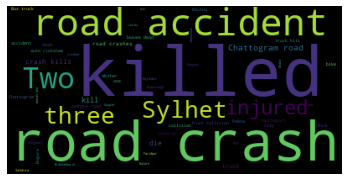

In [53]:
#Give our Rome corpus a variable name
_corpus = all_head

#Instantiate wordcloud object and use method to feed it our corpus
wc = WordCloud().generate_from_text(_corpus)

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc)
plt.axis('off')
plt.show()

In [78]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    mask = np.array(Image.open("../input/prothom-alo-20192021/bangladesh_map.jpg"))
    wc = WordCloud(background_color="white", mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                colormap='RdYlGn',
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


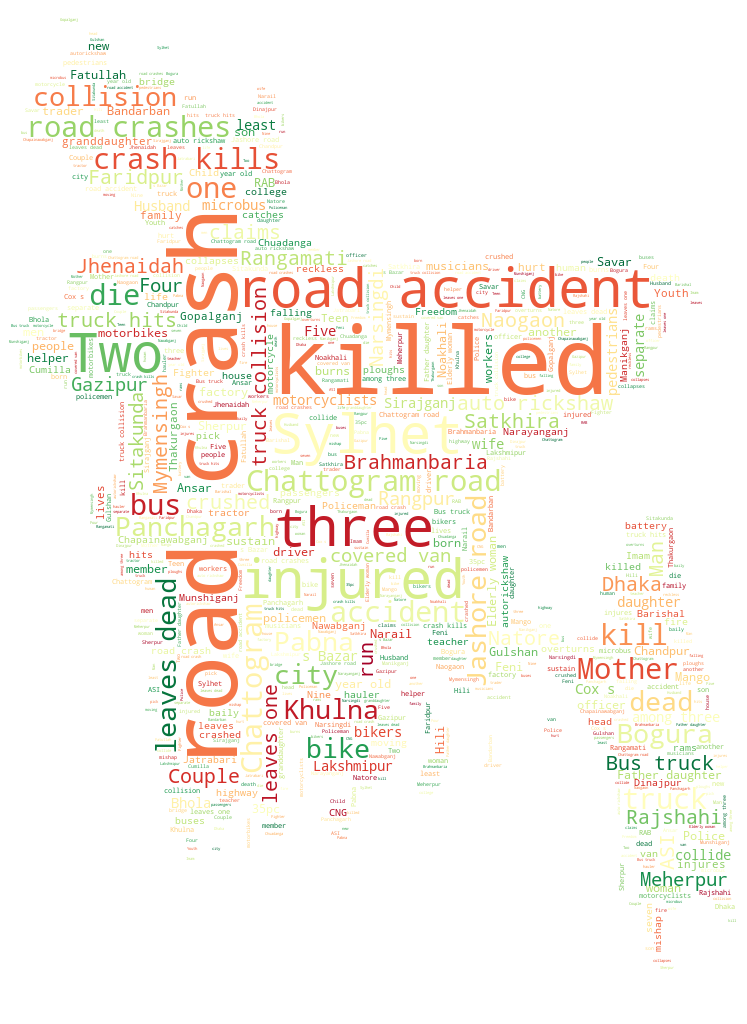

In [79]:
#Creating wordcloud for all tweets
create_wordcloud(all_head)